In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## D5 - plot small families min k prob

In [2]:
data = pd.read_csv("./smol_gpt_opt_min_k_prob.csv")

In [4]:
data.columns

Index(['series', 'model', 'rank', 'size_millions', 'k', 'average', 'std',
       'source_dataset'],
      dtype='object')

In [33]:
series_colors = {'gpt': "c", 'opt': "m", "smol": "g"}
models = [m.replace("df", "").replace("_", " ").title() for m in data['model'].unique()]
x = np.arange(len(models))
width=0.3

In [6]:
k_colors = {40: 'c', 50: 'm'}

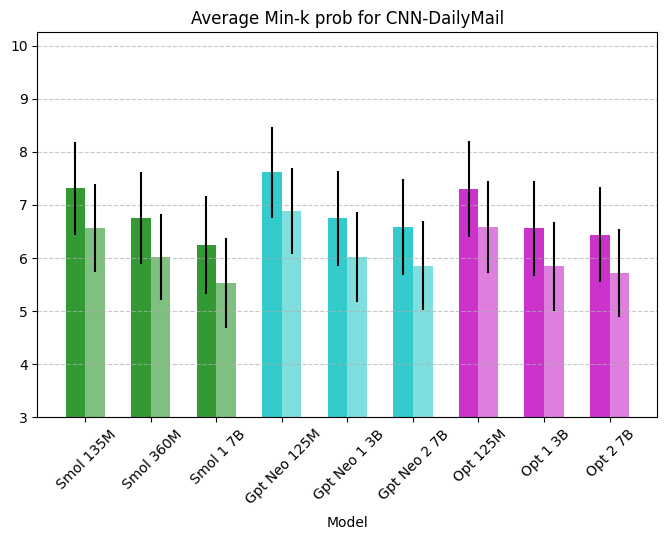

<Figure size 640x480 with 0 Axes>

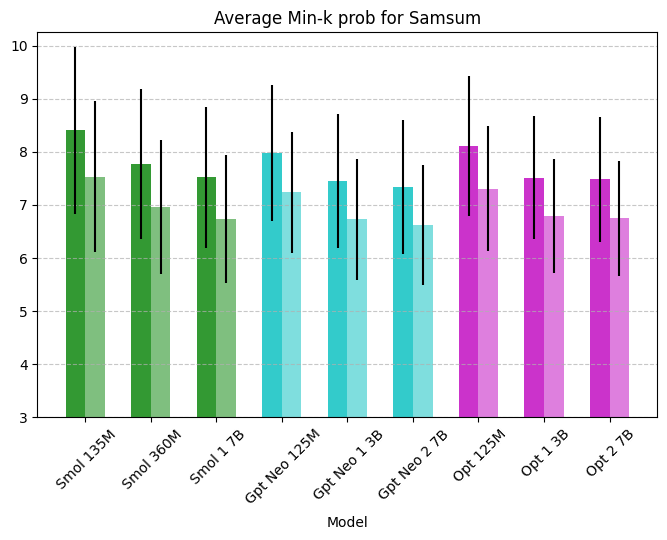

<Figure size 640x480 with 0 Axes>

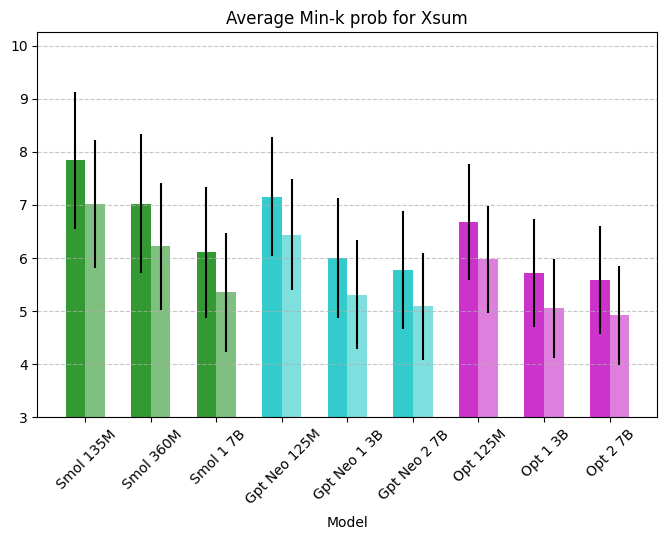

<Figure size 640x480 with 0 Axes>

In [38]:
for source, data_g in data.groupby('source_dataset'):
    # create plot
    plt.figure(figsize=(8, 5))
    plt.title(f"Average Min-k prob for {source}")
    # loop over series
    for s_name, s_g in data_g.groupby('series'):
        for i, (k_val, gg) in enumerate(s_g.groupby('k')):
            x_positions = [models.index(m.replace("df", "").replace("_", " ").title()) for m in gg['model']]
            plt.bar(
                np.array(x_positions) + (i * width - width / 2),
                gg['average'],
                yerr=gg['std'],
                width=width,
                label=f"k={k_val}",
                color=series_colors[s_name],
                alpha=(0.8 - i * 0.3)
            )
    plt.xlabel("Model")
    # plt.ylabel("Average min-k prob")
    plt.xticks(x, models, rotation=45)  
    plt.ylim(3, 10.25)         
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.legend(k_colors.keys())
    plt.show()  # Show the plot for each dataset across all 3 model series
    plt.savefig(f"{source}_avg_min_k_prob_smol_gpt_opt.png", dpi=300, bbox_inches='tight')

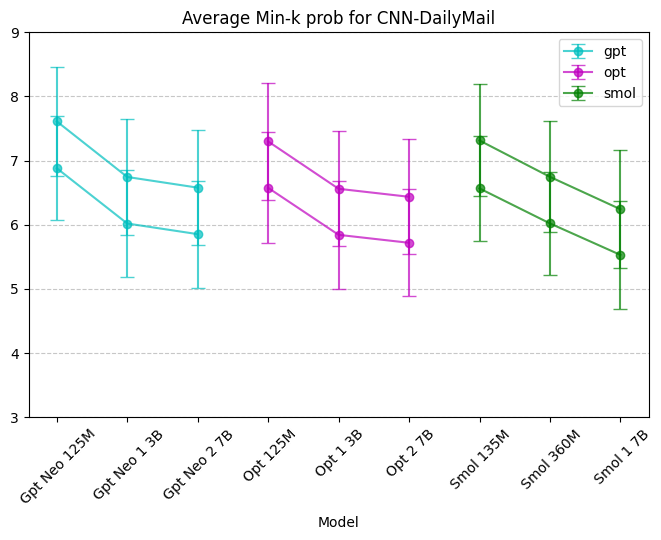

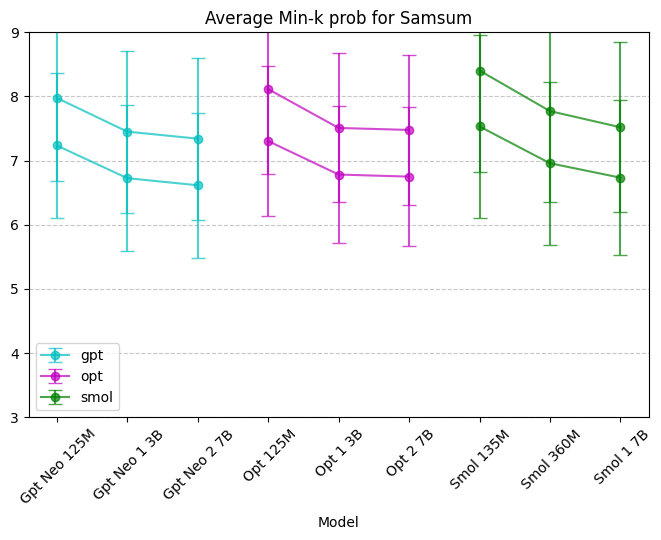

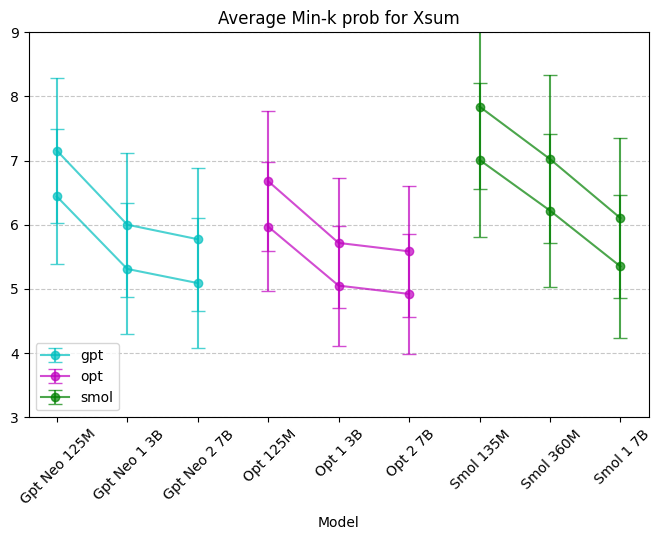

In [30]:
for source, data_g in data.groupby('source_dataset'):
    # create plot
    plt.figure(figsize=(8, 5))
    plt.title(f"Average Min-k prob for {source}")
    
    # loop over series
    for k_val, k_g in data_g.groupby('k'):
        for s_name, gg in k_g.groupby('series'):
            models = [m.replace("df", "").replace("_", " ").title() for m in gg['model']]
            plt.errorbar(
                # gg['size_millions'],
                # gg['model'],
                models,
                # gg['rank'],
                gg['average'],
                yerr=gg['std'],
                capsize=5,
                marker='o',
                linestyle='-',
                alpha=0.7,
                label=s_name,
                color=series_colors[s_name]
            )
        
    plt.xlabel("Model")
    # plt.ylabel("Average min-k prob")
    plt.xticks(rotation=45)
    plt.ylim(3, 9)         
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(series_colors.keys())
    plt.show()  # Show the plot for each dataset across all 3 model series

## Initial tables - prep

In [4]:
dataset_name = "CNN-DailyMail"

In [5]:
# # Treatment
df_deepseek_1_5b = pd.read_csv(f"./{dataset_name}/Treatment/results_deepseek-ai_DeepSeek-R1-Distill-Qwen-1.5B_{dataset_name}.csv")

df_gpt_neo_125m = pd.read_csv(f"./{dataset_name}/Treatment/results_EleutherAI_gpt-neo-125m_{dataset_name}.csv")
df_gpt_neo_1_3b = pd.read_csv(f"./{dataset_name}/Treatment/results_EleutherAI_gpt-neo-1.3B_{dataset_name}.csv")
df_gpt_neo_2_7b = pd.read_csv(f"./{dataset_name}/Treatment/results_EleutherAI_gpt-neo-2.7B_{dataset_name}.csv")

df_opt_125m = pd.read_csv(f"./{dataset_name}/Treatment/results_facebook_opt-125m_{dataset_name}.csv")
df_opt_1_3b = pd.read_csv(f"./{dataset_name}/Treatment/results_facebook_opt-1.3b_{dataset_name}.csv")
# df_opt_350m = pd.read_csv(f"./{dataset_name}/Treatment/results_facebook_opt-350m_{dataset_name}.csv")
df_opt_2_7b = pd.read_csv(f"./{dataset_name}/Treatment/results_facebook_opt-2.7b_{dataset_name}.csv")
df_opt_6_7b = pd.read_csv(f"./{dataset_name}/Treatment/results_facebook_opt-6.7b_{dataset_name}.csv")

df_vicuna_7b = pd.read_csv(f"./{dataset_name}/Treatment/results_lmsys_vicuna-7b-v1.5_{dataset_name}.csv")

# # Control
df_smol_1_7b = pd.read_csv(f"./{dataset_name}/Control/results_HuggingFaceTB_SmolLM2-1.7B-Instruct_{dataset_name}.csv")
df_smol_135m = pd.read_csv(f"./{dataset_name}/Control/results_HuggingFaceTB_SmolLM2-135M-Instruct_{dataset_name}.csv")
df_smol_360m = pd.read_csv(f"./{dataset_name}/Control/results_HuggingFaceTB_SmolLM2-360M-Instruct_{dataset_name}.csv")

df_phi_3_5 = pd.read_csv(f"./{dataset_name}/Control/results_microsoft_Phi-3.5-mini-instruct_{dataset_name}.csv")


In [6]:
dfs = {
    "df_deepseek_1_5b": df_deepseek_1_5b,
    "df_gpt_neo_1_3b": df_gpt_neo_1_3b,
    "df_gpt_neo_125m": df_gpt_neo_125m,
    "df_gpt_neo_2_7b": df_gpt_neo_2_7b,
    "df_opt_1_3b": df_opt_1_3b,
    "df_opt_125m": df_opt_125m,
    "df_opt_2_7b": df_opt_2_7b,
    # "df_opt_350m": df_opt_350m,
    "df_opt_6_7b": df_opt_6_7b,
    "df_vicuna_7b": df_vicuna_7b,
    "df_smol_1_7b": df_smol_1_7b,
    "df_smol_135m": df_smol_135m,
    "df_smol_360m": df_smol_360m,
    "df_phi_3_5": df_phi_3_5
}

In [7]:
gpt = ["df_gpt_neo_125m", "df_gpt_neo_1_3b", "df_gpt_neo_2_7b"]
# opt = ["df_opt_125m", "df_opt_350m", "df_opt_1_3b", "df_opt_2_7b", "df_opt_6_7b"]
opt = ["df_opt_125m", "df_opt_1_3b", "df_opt_2_7b", "df_opt_6_7b"]
vicuna = ["df_vicuna_7b"]
smol = ["df_smol_135m", "df_smol_360m", "df_smol_1_7b"]
phi = ["df_phi_3_5"]
treatment = gpt + opt + vicuna
contam = ["df_gpt_neo_125m", "df_opt_125m"]

series = {
    "gpt": gpt,
    "opt": opt,
    "vicuna": vicuna,
    "smol": smol,
    "phi": phi
}
# gpt = ["df_gpt_neo_1_3b", "df_gpt_neo_2_7b"]
# opt = ["df_opt_1_3b", "df_opt_2_7b"]

In [9]:
score_names = df_deepseek_1_5b.drop(['Unnamed: 0', 'Model', 'Task_Prefix', 'Dataset_Name', 'Model_Responses', 'Gold_Labels'], axis=1).columns
score_names = list(score_names)

In [ ]:
k_values = ["40", "50"]

for k in k_values:
    for model in opt:
        print(model, k)
        temp = dfs[model]
        avg = round(temp['Min_{}.0%_Prob'.format(k)].mean(), 4)
        sd = round(temp['Min_{}.0%_Prob'.format(k)].std(), 4)
        print("avg: {}".format(avg))
        print("std: {}".format(sd))

# initial tables - statistical significance check

In [ ]:
df_gpt_pairs = pd.read_csv(f"./t_test/{dataset_name}/gpt_neo_.csv")
df_opt_pairs = pd.read_csv(f"./t_test/{dataset_name}/opt.csv")
df_smol_pairs = pd.read_csv(f"./t_test/{dataset_name}/smol.csv")
df_sus_con_pairs = pd.read_csv(f"./t_test/{dataset_name}/sus_con_compare.csv")

In [ ]:
df_opt_pairs

## initial tables - extract appendix score reports (means, stdevs)

In [13]:
result = pd.DataFrame()
col_namer = { i+1: s.replace("_", " ") for i, s in enumerate(score_names)}

# loop over models in a group
for model in treatment:
    row = [model] # pre-pend row with model name
    for score in score_names:
        # add the average value for each metric for this model
        metric = dfs[model].loc[:,score]
        avg = round(metric.mean(), 4)
        sd = round(metric.std(), 4)
        row.append("{}±{}".format(avg, sd))
    temp = pd.DataFrame([row])
    result = pd.concat([result, temp])

# replace underscores and unnecessary symbols
result = result.rename(columns=col_namer, index=lambda c: str(c).replace("_", " "))
result.iloc[:, 0] = result.iloc[:, 0].str.replace("_", " ").str.replace("df", "").str.replace("%", "\%")
result

,0,cos sim scores,levenshtein distance,rouge1 precision,rouge1 recall,rouge1 f1,rouge2 precision,rouge2 recall,rouge2 f1,rougeL precision,rougeL recall,rougeL f1,Min 10.0% Prob,Min 20.0% Prob,Min 30.0% Prob,Min 40.0% Prob,Min 50.0% Prob
0,gpt neo 125m,0.3816±0.1782,259.0471±145.1005,0.1133±0.063,0.3447±0.1864,0.1663±0.0872,0.0232±0.0395,0.0752±0.1272,0.0344±0.0575,0.0849±0.0494,0.2576±0.1446,0.1244±0.0679,10.8698±1.1009,9.4321±0.9386,8.4407±0.8843,7.6114±0.8509,6.8815±0.8124
0,gpt neo 1 3b,0.3738±0.1821,255.4554±100.9911,0.1103±0.0614,0.3392±0.1778,0.1627±0.0854,0.0221±0.0378,0.0716±0.1199,0.033±0.0554,0.0808±0.0465,0.2481±0.1348,0.1191±0.0646,10.1516±1.1896,8.6351±1.0152,7.5919±0.9549,6.7452±0.8986,6.0199±0.8412
0,gpt neo 2 7b,0.3779±0.1893,256.3134±101.9847,0.1106±0.0622,0.3416±0.1828,0.1631±0.0866,0.022±0.0365,0.0722±0.1191,0.0329±0.0537,0.0817±0.0484,0.2519±0.1409,0.1203±0.0669,10.0177±1.1727,8.491±1.0317,7.4334±0.9668,6.5787±0.9008,5.8541±0.8356
0,opt 125m,0.3512±0.1896,261.2275±151.2178,0.103±0.0617,0.3202±0.1834,0.1516±0.086,0.0196±0.0356,0.0659±0.1155,0.0295±0.052,0.0763±0.0461,0.237±0.1375,0.1123±0.0645,10.6789±1.1379,9.1591±0.9995,8.1367±0.9574,7.299±0.9122,6.5758±0.8674
0,opt 1 3b,0.337±0.1947,257.4939±100.6969,0.0986±0.0616,0.3046±0.1851,0.1454±0.0868,0.0171±0.0348,0.0554±0.1113,0.0255±0.051,0.0725±0.0461,0.223±0.1379,0.1067±0.0647,9.9729±1.0657,8.4635±0.9943,7.4101±0.9437,6.5608±0.8961,5.8431±0.8383
0,opt 2 7b,0.2681±0.2041,260.2751±101.0518,0.083±0.0583,0.26±0.1799,0.123±0.0835,0.0125±0.0299,0.043±0.1008,0.019±0.0448,0.0619±0.0433,0.1934±0.1343,0.0916±0.0619,9.888±1.0679,8.3558±1.0061,7.2874±0.9498,6.4361±0.8948,5.7193±0.8321
0,opt 6 7b,0.366±0.1812,264.3253±110.5282,0.0993±0.0575,0.3268±0.1712,0.1484±0.0805,0.0196±0.0337,0.0693±0.1109,0.0298±0.05,0.073±0.0442,0.2408±0.1322,0.1091±0.0619,9.8428±1.1023,8.2642±1.0184,7.1724±0.9468,6.3129±0.893,5.5908±0.834
0,vicuna 7b,0.4625±0.2175,1038.6887±2622.0981,0.2374±0.1928,0.2623±0.1712,0.1973±0.1201,0.0635±0.1066,0.0599±0.1049,0.0472±0.0693,0.1589±0.1319,0.1779±0.1298,0.1301±0.0793,10.4702±1.0201,8.5124±0.9448,7.1976±0.8915,6.182±0.8432,5.3466±0.7889


In [ ]:
# print to get newliens
# format floats here
print(result.T.to_latex())

## initial tables - length check

In [ ]:
from nltk import word_tokenize

In [ ]:
values = {"Model_Responses": ""}
for model in dfs:
    # dfs[model].fillna(value=values, inplace=True)
    dfs[model].dropna(subset=["Model_Responses"], inplace=True)

In [ ]:
for model in dfs:
    print(model)
    out = dfs[model].Model_Responses.apply(word_tokenize).apply(len)
    gold = dfs[model].Gold_Labels.apply(word_tokenize).apply(len)
    
    print("response avg. length {}".format(out.mean()))
    print("gold avg. length {}".format(gold.mean()))

In [11]:
# score_ranges = {
#     "cosine": (-1, 1),
#     "levenshtein": (0, 15500),
#     "rouge1": (0, 1),
#     "rouge2": (0, 1),
#     "rougeL": (0, 1),
#     "min-k": (0, 20)
# }

In [10]:
# score_types = {
#     'cos_sim_scores': 'cosine',
#     'levenshtein_distance': 'levenshtein',
#     'rouge1_precision': 'rouge1',
#     'rouge1_recall': 'rouge1',
#     'rouge1_f1': 'rouge1',
#     'rouge2_precision': 'rouge2',
#     'rouge2_recall': 'rouge2',
#     'rouge2_f1': 'rouge2',
#     'rougeL_precision': 'rougeL',
#     'rougeL_recall': 'rougeL',
#     'rougeL_f1': 'rougeL',
#     'Min_10.0%_Prob': "min-k",
#     'Min_20.0%_Prob': "min-k",
#     'Min_30.0%_Prob': "min-k",
#     'Min_40.0%_Prob': "min-k",
#     'Min_50.0%_Prob': "min-k"
# }


In [14]:
# # loop over scores
# for score in score_names:
#     # determine score type and plot range
#     st = score_types[score]
#     sr = score_ranges[st]

#     # loop over series and models
#     for series_name, models in series.items(): 
#         plt.figure(figsize=(8, 5))
#         plt.title(f"{score} for {series_name.title()}")
        
#         means = [df_means[m][score][0] for m in models]
#         std_devs = [df_means[m][score][1] for m in models]
        
#         # Plot with error bars
#         plt.errorbar(models, means, yerr=std_devs, capsize=5, marker='o', linestyle='-',
#                      color=colors.get(score, "black"))

#         plt.xlabel("Model")
#         plt.ylabel("Value")
#         plt.xticks(rotation=45)
#         plt.ylim(sr[0], sr[1])  # Assuming values are between 0 and 1
#         plt.grid(axis='y', linestyle='--', alpha=0.7)
        
#         plt.show()  # Show the plot for each metric within the category
    